In [26]:
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.colors as matcol
from matplotlib import rc

rc('font',**{'family':'serif','serif':['Helvetica']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 15})
sns.set(font_scale=1.2)

summary = []

filename = 'plant'

path_to_file = filename+".csv"
df = pd.read_csv(path_to_file)

print(df)

        PGR  Concentration (mg/l)  Response (%)  Days to induction  Shoot no  \
0        MS                   0.0         70.00              15.33      1.33   
1    Zeatin                   0.5         90.00              14.33      2.00   
2    Zeatin                   1.0         96.60               9.66      3.66   
3    Zeatin                   1.5         96.60               7.33      4.66   
4    Zeatin                   2.0         96.60               7.33      4.00   
5    Zeatin                   2.5        100.00              13.66      3.33   
6        Mt                   0.5         93.33               5.33     12.00   
7        Mt                   1.0        100.00               5.66      9.33   
8        Mt                   1.5        100.00               5.33     12.66   
9        Mt                   2.0         93.33               7.33      2.66   
10       Mt                   2.5         90.00               9.33      6.33   
11      BAP                   0.5       

In [30]:
df['Response (%)'] = df['Response (%)']/100

In [27]:
df['Response (%)'] 

0      70.00
1      90.00
2      96.60
3      96.60
4      96.60
5     100.00
6      93.33
7     100.00
8     100.00
9      93.33
10     90.00
11     83.33
12     93.33
13    100.00
14     90.00
15     96.66
16     83.33
17     93.33
18     93.33
19     93.33
20     80.00
Name: Response (%), dtype: float64

In [31]:
metrics = ['Response (\%)',	'Days to induction','Shoot no',	'No. of leaves','Shoot length (cm)']
final_df = []
for i in range(21):
    for j in range(5):
            final_df.append([df.values[i][0]+' '+str(df.values[i][1]),metrics[j],int(df.values[i][j+2])])
summary_df2 = pd.DataFrame(final_df, columns=['Instances','Indicators','Mean'])
summary_df2 = summary_df2.pivot("Instances", 'Indicators','Mean')

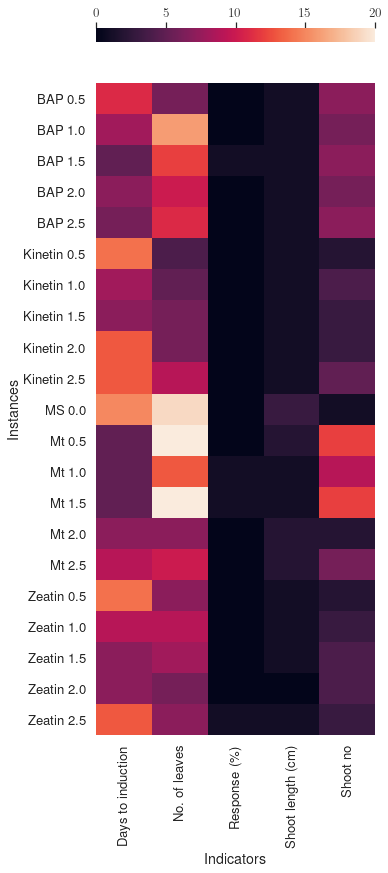

In [32]:
fig = plt.figure(1, figsize=(5, 15))
ax = fig.add_subplot(111)
ax = sns.heatmap(summary_df2, cbar_kws =  dict(use_gridspec=False,location="top"))
filename_fig = 'Heatmap_plant2'
fig.savefig(filename_fig + '.pdf', bbox_inches='tight')

In [ ]:
summary_df = []
for i in range(np.shape(summary)[0]):
    for j in range(len(approaches)):
            summary_df.append([summary[i][0]+'_'+summary[i][2]+'_'+summary[i][1]+'_'+summary[i][3],approaches[j],int(summary[i][j+4])])

#fig = plt.figure(1, figsize=(3.5, 8))
fig = plt.figure(1, figsize=(2.7, 6))
#fig = plt.figure(1, figsize=(3.5, 11))
# fig = plt.figure()
ax = fig.add_subplot(111)
summary_df2 = pd.DataFrame(summary_df, columns=['Instances','Approaches','Rank'])
summary_df2 = summary_df2.pivot("Instances", "Approaches", "Rank")
#summary_df2 = summary_df2.reindex(summary_df2.sort_values(by='Instances', ascending=True).index)
summary_df2=summary_df2[approaches]
print(summary_df2)
color_map = plt.cm.get_cmap('viridis')
reversed_color_map = color_map.reversed()
reversed_color_map = reversed_color_map(np.linspace(0,1,(len(approaches))))
reversed_color_map = matcol.ListedColormap(reversed_color_map)
ax = sns.heatmap(summary_df2, yticklabels=False, cmap=reversed_color_map,cbar_kws =  dict(use_gridspec=False,location="top"))
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([1, len(approaches)])
#colorbar.set_ticks([-7, 7])
colorbar.set_ticklabels(['Best', 'Worst'])
fig = ax.get_figure()
#fig.show()
filename_fig = 'Heatmap_'+comparison+'_'+testbench
fig.savefig(filename_fig + '.pdf', bbox_inches='tight')